In [ ]:
from backend.viz.clickmap import run_click_gui
run_click_gui("./masks/from_nb.json", H=128, W=128,
              bg_path=None, bg_channel=0,
              vmax=None, vmin=None, max_points=10)


# 数据预处理+Dataloader

In [ ]:
# h5
import yaml
import backend.dataio as _
from backend.dataio.api import run
cfg = yaml.safe_load(open("examples/data_configs/h5_sparse.yaml","r"))
dataset, dls, summary = run(cfg)

In [2]:
# mat
import yaml
import backend.dataio as _
from backend.dataio.api import run
cfg = yaml.safe_load(open("examples/data_configs/mat_full.yaml","r"))
dataset, dls, summary = run(cfg)

In [1]:
# nc
import yaml
import backend.dataio as _
from backend.dataio.api import run
cfg = yaml.safe_load(open("examples/data_configs/nc_full.yaml","r"))
dataset, dls, summary = run(cfg)

dataset.array5d: shape=[1,1501,80,640,2], dtype=float32
#samples: 1501; has transforms: True
channels: ['u', 'v']
[split] total samples: 1501
  - train:   1200  (79.9%)
  - val  :    150  (10.0%)
  - test :    151  (10.1%)

[visualize] 使用 split='train' 进行可视化

[sizecheck] —— 估算首个 batch 体积 ——
[array5d] shape=[1,1501,80,640,2], dtype=float32
[sampler] #samples in dataset: 1501  (expected N*T=1501 if per_frame)
[batch0] batch_size=12, approx_bytes=17.20 MB (x:2457600, y:1228800, cond:614400)
[batch 0] x.shape=[12, 4, 80, 640] -> BCHW
[batch 0] y.shape=[12, 2, 80, 640] -> BCHW
[batch 0] cond.shape=[12, 1, 80, 640] -> BCHW


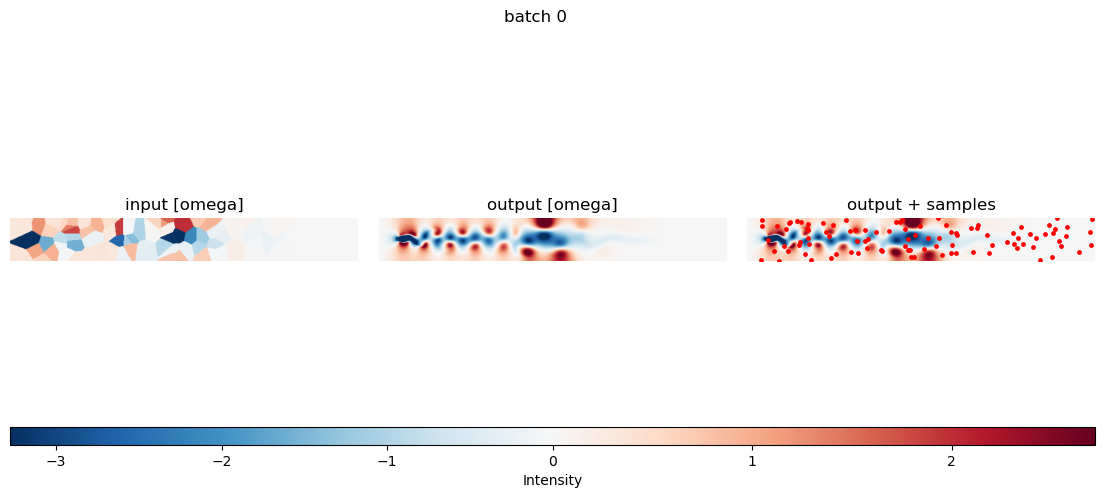

[batch 1] x.shape=[12, 4, 80, 640] -> BCHW
[batch 1] y.shape=[12, 2, 80, 640] -> BCHW
[batch 1] cond.shape=[12, 1, 80, 640] -> BCHW


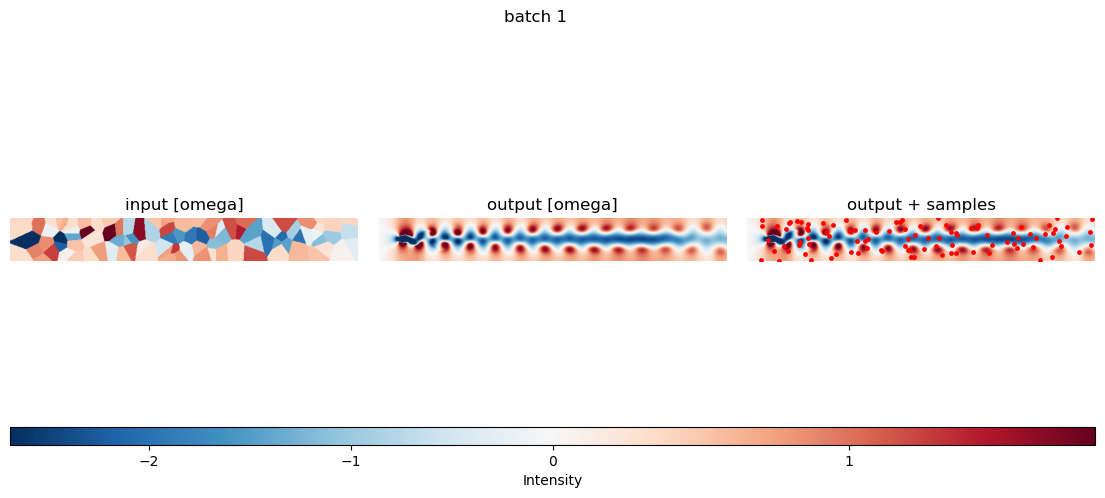

In [2]:
from backend.viz.data_inspect import one_click_check
one_click_check(dataset, dls, channel="omega", n_batches=2)

In [ ]:
dls

# 训练单元

In [ ]:
# Smoke Test
import yaml
cfg = yaml.safe_load(open("examples/train_configs/epd_smoketest_unet.yaml", "r"))

train_dl = dls['train']
val_dl   = dls['val']
test_dl  = dls['test']
dataloaders = (train_dl, val_dl, test_dl)

from backend.train.smoke.pipeline import run_smoke
model, artefacts = run_smoke(cfg, train_dl, val_dl, test_dl)
artefacts


In [1]:
# Full Test
import yaml
cfg = yaml.safe_load(open("examples/train_configs/train_vit_base_nc.yaml", "r"))

# train_dl = dls['train']
# val_dl   = dls['val']
# test_dl  = dls['test']

from backend.train.runner import run_training
# model, artefacts = run_training(cfg, train_dl, val_dl, test_dl)
model, artefacts = run_training(cfg)
artefacts


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name       | Type          | Params | Mode 
-----------------------------------------------------
0 | encoder    | ViTEncoder    | 0      | train
1 | propagator | ViTPropagator | 499 K  | train
2 | decoder    | ViTDecoder    | 1.0 M  | train
3 | head       | _PixelHead    | 66     | train
-----------------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.

Epoch 0: 100%|██████████| 38/38 [00:03<00:00, 11.90it/s, v_num=5237, train_loss_step=1.070, train_total_step=1.070, val_loss_step=1.600, val_total_step=1.600, val_loss_epoch=1.440, val_total_epoch=1.440, train_loss_epoch=2.150, train_total_epoch=2.150]

Metric val_total improved. New best score: 1.438


Epoch 1: 100%|██████████| 38/38 [00:03<00:00, 12.21it/s, v_num=5237, train_loss_step=0.931, train_total_step=0.931, val_loss_step=1.370, val_total_step=1.370, val_loss_epoch=1.230, val_total_epoch=1.230, train_loss_epoch=1.490, train_total_epoch=1.490]

Metric val_total improved by 0.209 >= min_delta = 0.0. New best score: 1.229


Epoch 2:  63%|██████▎   | 24/38 [00:01<00:01, 13.55it/s, v_num=5237, train_loss_step=0.952, train_total_step=0.952, val_loss_step=1.370, val_total_step=1.370, val_loss_epoch=1.230, val_total_epoch=1.230, train_loss_epoch=1.270, train_total_epoch=1.270]

`Trainer.fit` stopped: `max_steps=100` reached.


Epoch 2:  63%|██████▎   | 24/38 [00:01<00:01, 12.78it/s, v_num=5237, train_loss_step=0.952, train_total_step=0.952, val_loss_step=1.370, val_total_step=1.370, val_loss_epoch=1.230, val_total_epoch=1.230, train_loss_epoch=1.270, train_total_epoch=1.270]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing DataLoader 0: 100%|██████████| 5/5 [00:00<00:00, 36.23it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test_loss_epoch      │     3.066654920578003     │
│     test_total_epoch      │     3.066654920578003     │
└───────────────────────────┴───────────────────────────┘

{'run_dir': 'runs/vit_base_epd_nc/20251015_165237',
 'best_checkpoint': '/home/wyr/projects/Sana/runs/vit_base_epd_nc/20251015_165237/checkpoints/001-1.2294.ckpt',
 'config': 'runs/vit_base_epd_nc/20251015_165237/config.dump.yaml',
 'eval_log': 'runs/vit_base_epd_nc/20251015_165237/eval_log.jsonl',
 'eval_vis': 'runs/vit_base_epd_nc/20251015_165237/eval_vis'}